In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
np.random.seed(1654)

## Model a probabilistic escape from a room

In [3]:
global d_last_escape_event 
d_last_escape_event = []


def ant_trial():
    global d_last_escape_event 
    pos = np.array([25,25])
    x = pos[0]
    y = pos[1]

    d = []
    d.append(pos)

    
    for t in range(600):

        while True:
            u = np.random.uniform(low = 0,high = 1)
            if u < 0.25:
                x = pos[0] - 2
            elif (.25 <= u < .5):
                x = pos[0] + 2
            elif (.5 <= u < .75):
                y = pos[1] + 2
            else:
                y = pos[1] - 2
            # are still inside    
            if(x > 0 and x < 50) and (y > 0 and y < 50):
                break
            # it got outside
            if (20 <= x <= 30) and y>=50:
                break
            # otherwise we have hit a wall so repeat
          
        d.append(np.array([x,y]))

        pos = np.array([x,y])
       
        # it got outside
        if (20 <= x <= 30) and y>=50:
            break

    # it got outside        
    if (20 <= x <= 30) and y>=50:
        d_last_escape_event = d
        return True
    else:    
        return False 


def ant_trial_stats(attempts):
    escapes = 0
    for i in range(attempts):
        escape = ant_trial()
        if escape:
            escapes += 1
    probability = escapes/attempts
    return np.array([attempts, escapes, probability])
         

def generate_data_frame():
    attempts = np.linspace(10, 1000, 19)

    d = []
    for i in attempts:
        d.append(ant_trial_stats(int(i)))
    
    df = pd.DataFrame(d, columns = ['attempts', 'escapes', 'probability'])

    return df

df = generate_data_frame()
df_escape = pd.DataFrame(d_last_escape_event, columns = ['x', 'y'])
display(df)
display(df_escape)

,attempts,escapes,probability
0,10.0,2.0,0.200000
1,65.0,21.0,0.323077
2,120.0,36.0,0.300000
3,175.0,56.0,0.320000
4,230.0,58.0,0.252174
5,285.0,70.0,0.245614
6,340.0,94.0,0.276471
7,395.0,108.0,0.273418
8,450.0,120.0,0.266667
9,505.0,135.0,0.267327


,x,y
0,25,25
1,23,25
2,23,23
3,23,21
4,21,21
...,...,...
352,19,45
353,21,45
354,21,47
355,21,49


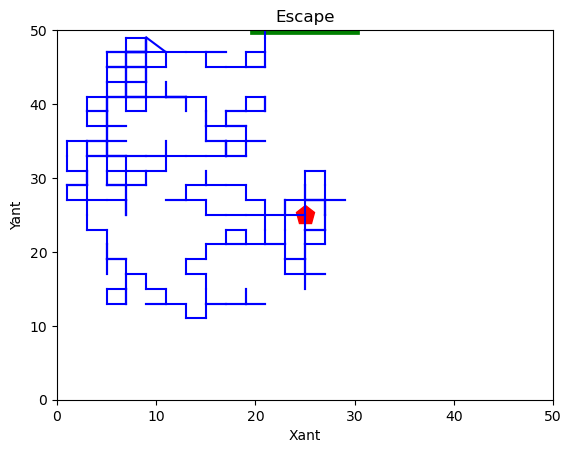

In [4]:
x1 = df_escape.iloc[0]['x']
y1 = df_escape.iloc[1]['y']

plt.plot(x1, y1, 'rp', markersize=14)
plt.plot([20,30],[50,50], linewidth=7.0, color = 'green')
plt.xticks([0, 10, 20, 30, 40, 50])
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlim(0, 50)
plt.ylim(0, 50)
for index, row in df_escape.iterrows(): # if plot_results is a DataFrame
    x2 = row['x']
    y2 = row['y']
    plt.plot([x1,x2],[y1,y2],color = 'blue') 
    x1 = x2
    y1 = y2
plt.title("Escape")
plt.xlabel("Xant")
plt.ylabel("Yant")
plt.show()

Mean:  0.2669265094211707 Median:  0.2641025641025641


Text(0, 0.5, 'Frequency')

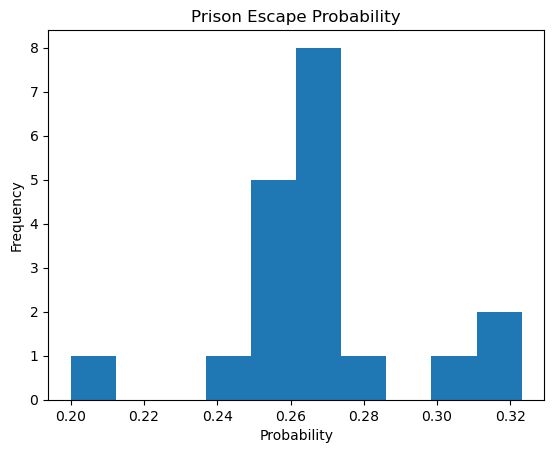

In [5]:
mean = df['probability'].mean()
median = df['probability'].median()
print("Mean: ", mean, "Median: ", median)
plt.hist(df['probability'], bins = 10)
plt.title('Prison Escape Probability')
plt.xlabel('Probability')
plt.ylabel('Frequency')

coefficients: [0.         0.25658692]
Intercept / bias:  3.5814992025518677
r_sqr value: 0.9974401282525589


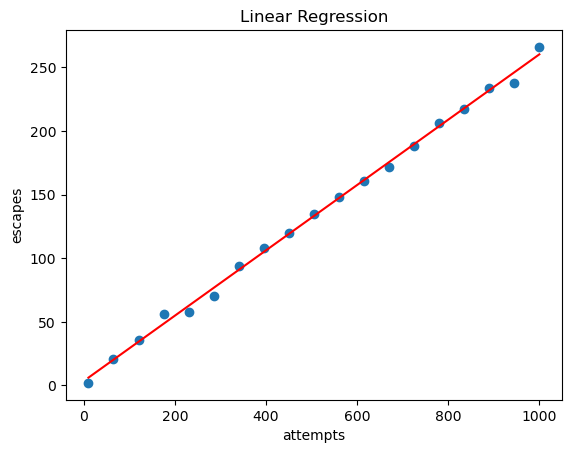

In [6]:
plt.scatter(df['attempts'], df['escapes'])

from sklearn import linear_model, metrics
reg = linear_model.LinearRegression()

N=df['attempts'].size
X = np.c_[np.ones(N), df['attempts']]
y = df['escapes'].values
reg.fit(X, y)
print(f'coefficients:', reg.coef_)
print(f'Intercept / bias: ', reg.intercept_)
print(f'r_sqr value: {reg.score(X, y)}')

x_grid = np.linspace(X[:,1].min(), X[:,1].max(),1000) 
Xn = np.c_[np.ones(x_grid.size), x_grid] 
b = np.array([reg.intercept_, reg.coef_[1]])
b.reshape(1,-1)
yp = np.dot(Xn,b)
plt.xlabel('attempts')
plt.ylabel('escapes')
plt.title('Linear Regression')
plt.plot(Xn[:,1], yp, color = 'red')